# Classificador de Sentimentos para Reviews de Filmes (NLP)

Este notebook detalha o processo de construção de um modelo de Machine Learning para classificar reviews do IMDb como 'positivas' ou 'negativas'. O projeto abrange desde a limpeza e pré-processamento do texto até o treinamento e avaliação comparativa de dois modelos de classificação: Regressão Logística e Random Forest.

In [1]:
import pandas as pd

caminho_do_arquivo = '../data/raw/IMDB Dataset.csv'

# Usa o pandas para ler o arquivo CSV e carregar em uma "tabela" chamada DataFrame
df = pd.read_csv(caminho_do_arquivo)

## Análise inicial

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**Conclusão da Análise:** O dataset está perfeitamente balanceado, com 25.000 amostras para cada classe. Isso é excelente, pois evita que o modelo se torne tendencioso para a classe majoritária durante o treinamento.

## "Texto sujo"

In [5]:
# Pega o texto da primeira review (na linha de índice 0) e o imprime na tela
print(df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

## 2. Pré-processamento e Limpeza dos Dados com expressões regulares

Antes que um modelo de Machine Learning possa 'entender' o texto, precisamos limpá-lo e padronizá-lo. Nesta seção, removeremos ruídos como tags HTML, converteremos o texto para um formato uniforme (minúsculas) e o dividiremos em seus componentes básicos (tokens), removendo palavras comuns e sem significado de sentimento (stopwords).

In [6]:
import re # A biblioteca de expressões regulares do Python

# Função para limpar as tags HTML
def limpar_html(texto):
  # A expressão r'<.*?>' encontra qualquer coisa que comece com '<' e termine com '>'
  return re.sub(r'<.*?>', '', texto)

# Vamos criar uma nova coluna 'review_limpa' aplicando essa função em todas as as reviews
# O .apply() diz ao Pandas: "execute esta função para cada linha da coluna 'review'"
df['review_limpa'] = df['review'].apply(limpar_html)

# Vamos ver o resultado na primeira review
print(df['review_limpa'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wou

## Padronizando em letras minúsculas

In [7]:
df['review_limpa'] = df['review_limpa'].str.lower()

# Vamos ver o resultado novamente
print(df['review_limpa'][0])

one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wou

## Processo de tokenização

Processando uma lista de palavras individuais em vez de um texto completo

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Baixando os 'dicionários' que o NLTK precisa para saber como tokenizar
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /home/felipe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/felipe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# Criamos uma nova coluna 'tokens', aplicando a tokenização
df['tokens'] = df['review_limpa'].apply(word_tokenize)

df.head()

,review,sentiment,review_limpa,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...,"[a, wonderful, little, production, ., the, fil..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","[petter, mattei, 's, ``, love, in, the, time, ..."


## Removendo também as stopwords

In [10]:
from nltk.corpus import stopwords

# Baixando a lista de stopwords em inglês
nltk.download('stopwords')

# Pega a lista de stopwords em inglês
# Usamos set() para tornar a busca pelas palavras muito mais rápida
stop_words = set(stopwords.words('english'))

# Função para remover as stopwords de uma lista de tokens
def remover_stopwords(tokens):
  return [palavra for palavra in tokens if palavra.isalpha() and palavra not in stop_words]

# Criamos nossa coluna final de tokens limpos
df['tokens_limpos'] = df['tokens'].apply(remover_stopwords)

# Vamos ver o resultado final
df.head()

[nltk_data] Downloading package stopwords to /home/felipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,review_limpa,tokens,tokens_limpos
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...,"[a, wonderful, little, production, ., the, fil...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ..."


## Juntando os Tokens de Volta para vetorização posterior

In [11]:
# Função para juntar uma lista de tokens em uma string única, separada por espaços
def juntar_tokens(tokens):
  return ' '.join(tokens)

# Cria uma nova coluna com o texto final, pronto para a vetorização
df['review_final'] = df['tokens_limpos'].apply(juntar_tokens)

# Uma olhada no antes e depois
df[['review', 'review_final']].head()

,review,review_final
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


## Dividindo em treino e teste

In [12]:
from sklearn.model_selection import train_test_split

# Features
X = df['review_final']
# Target
y = df['sentiment']

# 80% para treino, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% dos dados vão para teste
    random_state=42,     # Garante que a divisão seja sempre a mesma, para reprodutibilidade
    stratify=y           # Garante que a proporção de reviews positivas/negativas seja a mesma em treino e teste
)

## Aplicando o Vetorizador TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Cria o "tradutor" (vetorizador)
# max_features=5000 diz a ele para considerar apenas as 5000 palavras mais importantes
vectorizer = TfidfVectorizer(max_features=5000)

# 2. "Aprende" o vocabulário e TRADUZ os dados de treino
# .fit_transform() faz duas coisas: 'fit' aprende o vocabulário e 'transform' o aplica
X_train_tfidf = vectorizer.fit_transform(X_train)

# 3. Apenas TRADUZ os dados de teste com o vocabulário que já aprendeu
X_test_tfidf = vectorizer.transform(X_test)

## Treinando inicialmente o modelo de regressão logistica 

In [14]:
from sklearn.linear_model import LogisticRegression

# 1. Cria uma instância do nosso "aluno" (o modelo)
modelo_logreg = LogisticRegression(random_state=42, max_iter=1000)

# 2. Treina o modelo com os dados de treino. O .fit() é o comando para "aprender".
print("Iniciando o treinamento do modelo...")
modelo_logreg.fit(X_train_tfidf, y_train)
print("Modelo treinado com sucesso!")

Iniciando o treinamento do modelo...
Modelo treinado com sucesso!


## Fazendo previsões

In [15]:
# Usa o modelo treinado para prever os sentimentos dos dados de teste
y_pred = modelo_logreg.predict(X_test_tfidf)

# Vamos comparar as 10 primeiras previsões do modelo com as 10 respostas reais
print("As 10 primeiras previsões:", y_pred[:10])
print("As 10 respostas reais:   ", y_test[:10].values)

As 10 primeiras previsões: ['negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']
As 10 respostas reais:    ['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']


## Avaliando o desempenho

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 88.87%


## Relatório de classificação detalhado

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Matriz de confusão

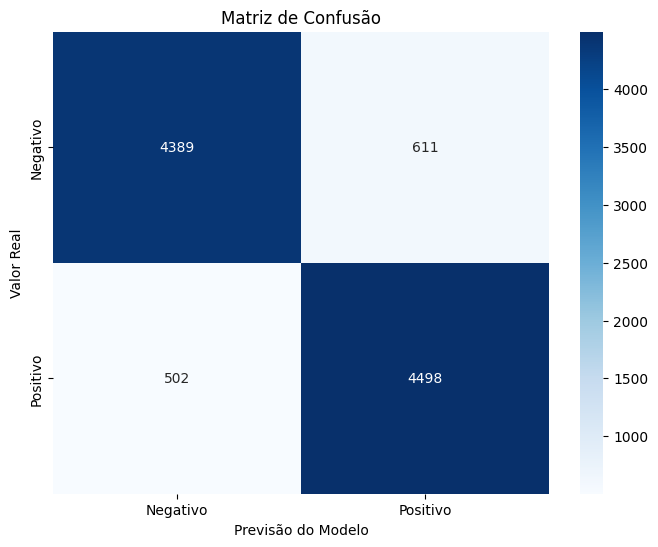

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão usando um heatmap para melhor visualização
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

## Treinando um modelo mais complexo também

Os resultados da regressão logística se mostraram satisfatórios, confirmando que os dados estão bem limpos e preparados
Mas ainda sim, vou experimentar um modelo mais complexo de Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# 1. Cria uma instância do nosso comitê de especialistas
# n_estimators=100 significa que teremos 100 "árvores" no comitê
# n_jobs=-1 usa todos os processadores para acelerar o treino
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Treina o modelo com os mesmos dados de treino
print("Iniciando o treinamento do Random Forest... (isso pode levar alguns minutos, por favor aguarde)")
modelo_rf.fit(X_train_tfidf, y_train)
print("Modelo Random Forest treinado com sucesso!")

Iniciando o treinamento do Random Forest... (isso pode levar alguns minutos, por favor aguarde)
Modelo Random Forest treinado com sucesso!


## Avaliando o Random Forest

In [20]:
# Faz as previsões com o novo modelo
y_pred_rf = modelo_rf.predict(X_test_tfidf)

# Calcula a acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf * 100:.2f}%")

# Imprime o relatório de classificação completo
print("\nRelatório de Classificação do Random Forest:")
print(classification_report(y_test, y_pred_rf))

Acurácia do Random Forest: 84.98%

Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      5000
    positive       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Comparação

**Conclusão da Modelagem:** A Regressão Logística (88.87%) superou o Random Forest (84.98%) em acurácia e foi significativamente mais rápida para treinar. 

Apesar do Random Forest ser mais complexo, isso não necessariamente induz melhor desempenho para este caso
Além disso, um modelo mais rápido e simples como regressão logística, tendo um desempenho excelente e até superior ao de modelos complexos é certamente a melhor escolha em um projeto como este.



## Salvando o modelo

In [21]:
import joblib
import os

caminho_pasta_modelos = '../models'
os.makedirs(caminho_pasta_modelos, exist_ok=True)

caminho_modelo = os.path.join(caminho_pasta_modelos, 'classificador_sentimento_logreg.pkl')
joblib.dump(modelo_logreg, caminho_modelo)

caminho_vetorizador = os.path.join(caminho_pasta_modelos, 'vetorizador_tfidf.pkl')
joblib.dump(vectorizer, caminho_vetorizador)

print(f"Modelo salvo em: {caminho_modelo}")
print(f"Vetorizador salvo em: {caminho_vetorizador}")

Modelo salvo em: ../models/classificador_sentimento_logreg.pkl
Vetorizador salvo em: ../models/vetorizador_tfidf.pkl


/tmp/ipykernel_41947/2612170341.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Palavra', data=top_palavras, palette='viridis')


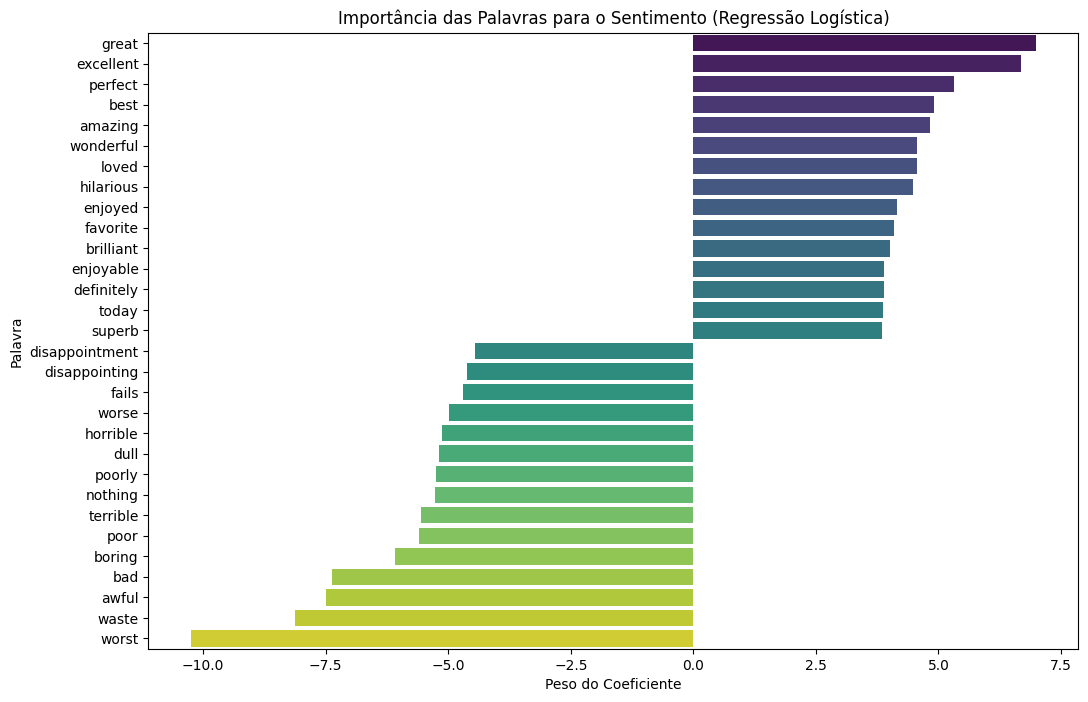

In [22]:
import numpy as np

# Pega os nomes das features (as 5000 palavras) do vetorizador
feature_names = np.array(vectorizer.get_feature_names_out())

# Pega os coeficientes (pesos) do modelo de Regressão Logística
# O modelo tem um coeficiente para cada palavra
coeficientes = modelo_logreg.coef_[0]

# Cria um DataFrame do pandas para visualizar os pesos
df_coef = pd.DataFrame(data={'Palavra': feature_names, 'Coeficiente': coeficientes})

# Ordena o DataFrame pelos coeficientes
df_coef_sorted = df_coef.sort_values(by='Coeficiente', ascending=False)

# --- Plotando o gráfico ---
plt.figure(figsize=(12, 8))

# Pega as 15 palavras com os maiores pesos (mais positivas)
top_positivas = df_coef_sorted.head(15)
# Pega as 15 palavras com os menores pesos (mais negativas)
top_negativas = df_coef_sorted.tail(15)

# Concatena as duas para plotar
top_palavras = pd.concat([top_positivas, top_negativas])

# Plota o gráfico de barras
sns.barplot(x='Coeficiente', y='Palavra', data=top_palavras, palette='viridis')
plt.title('Importância das Palavras para o Sentimento (Regressão Logística)')
plt.xlabel('Peso do Coeficiente')
plt.ylabel('Palavra')
plt.show()